In [ ]:
!pip install pykalman


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48442 sha256=46cbf423f770e9b25f0d27641ab459db15700d42af69a3fd3c46a41744f99662
  Stored in directory: /root/.cache/pip/wheels/76/33/ef/5f332226e13a5089c6dd4b01cc2bcb59491d18f955fa2d3807
Successfully built pykalman


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from pykalman import KalmanFilter


In [ ]:
v0 = 30 #constant speed
mu = 0  #mean = 0
sd = 0.1 # standard deviation
x0 = 0 #initail location
dt = 0.1 #interval time
a = 0 #constant speed => accelaration = 0
p0 = 0.5 # estimate uncertainty of the initialized state

In [ ]:
#lets calculate ground truth
GT = []
x = x0
for i in range(100): #lets calculate it for 100 intervals.
    v0 = v0
    x = x + dt*v0
    GT.append(x)
print(GT)

[3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0, 27.0, 30.0, 33.0, 36.0, 39.0, 42.0, 45.0, 48.0, 51.0, 54.0, 57.0, 60.0, 63.0, 66.0, 69.0, 72.0, 75.0, 78.0, 81.0, 84.0, 87.0, 90.0, 93.0, 96.0, 99.0, 102.0, 105.0, 108.0, 111.0, 114.0, 117.0, 120.0, 123.0, 126.0, 129.0, 132.0, 135.0, 138.0, 141.0, 144.0, 147.0, 150.0, 153.0, 156.0, 159.0, 162.0, 165.0, 168.0, 171.0, 174.0, 177.0, 180.0, 183.0, 186.0, 189.0, 192.0, 195.0, 198.0, 201.0, 204.0, 207.0, 210.0, 213.0, 216.0, 219.0, 222.0, 225.0, 228.0, 231.0, 234.0, 237.0, 240.0, 243.0, 246.0, 249.0, 252.0, 255.0, 258.0, 261.0, 264.0, 267.0, 270.0, 273.0, 276.0, 279.0, 282.0, 285.0, 288.0, 291.0, 294.0, 297.0, 300.0]


In [ ]:
#in this func, with mean = mu and variance of sd
def noise(mu,sd):
    n = np.random.normal(mu,sd)
    return n

In [ ]:
#lets caculate mse
def mse(a,b):
    d = []
    for i in range(len(b)):
        c = ((b[i]-a[i])**2)/2
        d.append(c)
    return np.mean(np.array(d))

In [ ]:
#lets calculate sensor loacations
SL = []
x = x0
v = v0
SV = [] #sensor recorded velocity
SV.append(30)
for i in range(100):
    x_t_1 = x
    x = x + dt*v0 + noise(mu,sd) #here we add random noise to it
    SL.append(x)
    v = (x - x_t_1)/dt
    SV.append(v)
print(SL)
print("\n",SV)

[3.002013238501208, 6.045713202859542, 9.003124362599934, 12.08277260724285, 15.147542156817343, 18.08149531629326, 21.004932592316813, 24.083515039032168, 26.979959258943826, 29.87550029895542, 32.905677835151835, 36.02139724791835, 39.01280340349714, 42.02764874733706, 44.97801030791424, 47.84912937436746, 50.79799769950457, 53.84934568349815, 56.7971808217996, 59.92857823031762, 62.797813365726284, 65.75205528754272, 68.77565717389287, 71.68625758542339, 74.6757646760643, 77.71461893894605, 80.6557964264524, 83.75150976632327, 86.70034434557768, 89.73524742276837, 92.53799584647132, 95.65818171185593, 98.75423322465372, 101.73417556815853, 104.71114561326638, 107.67622496646965, 110.78088816807721, 113.8542421086223, 116.69051843986244, 119.51287935761007, 122.63232058598648, 125.80054795099697, 128.44178661416368, 131.23302170524752, 134.1522782649069, 137.15674673444258, 140.21194205735353, 143.36340485726492, 146.23379813134468, 149.35578740630976, 152.36148976373826, 155.3214102

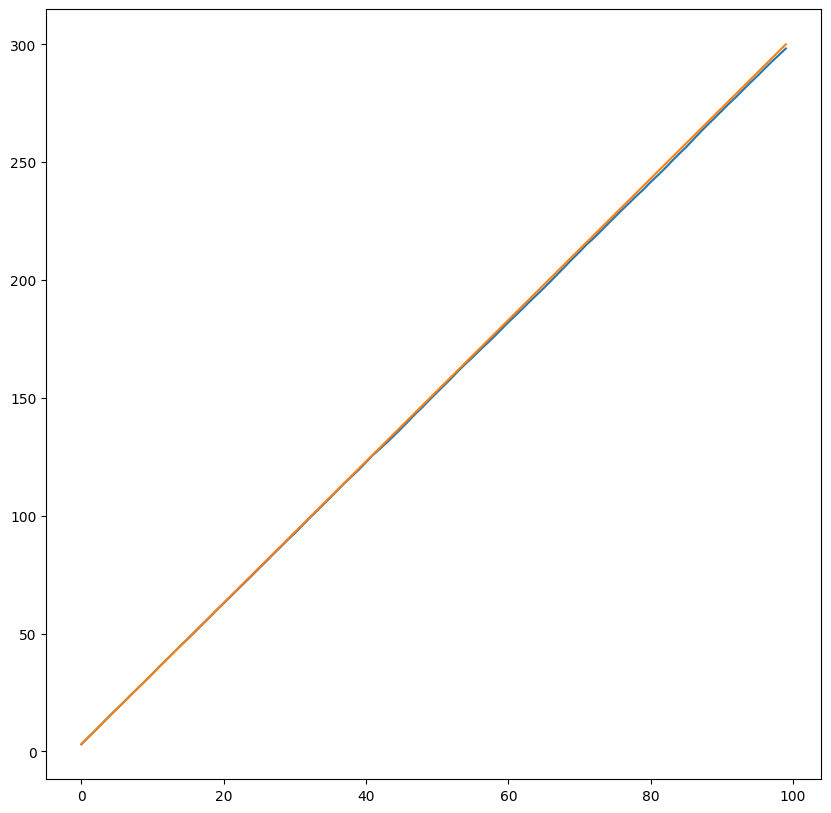

In [ ]:
plt.figure(figsize=(10,10))
display(plt.plot(SL)) #measurements
display(plt.plot(GT)) #true values

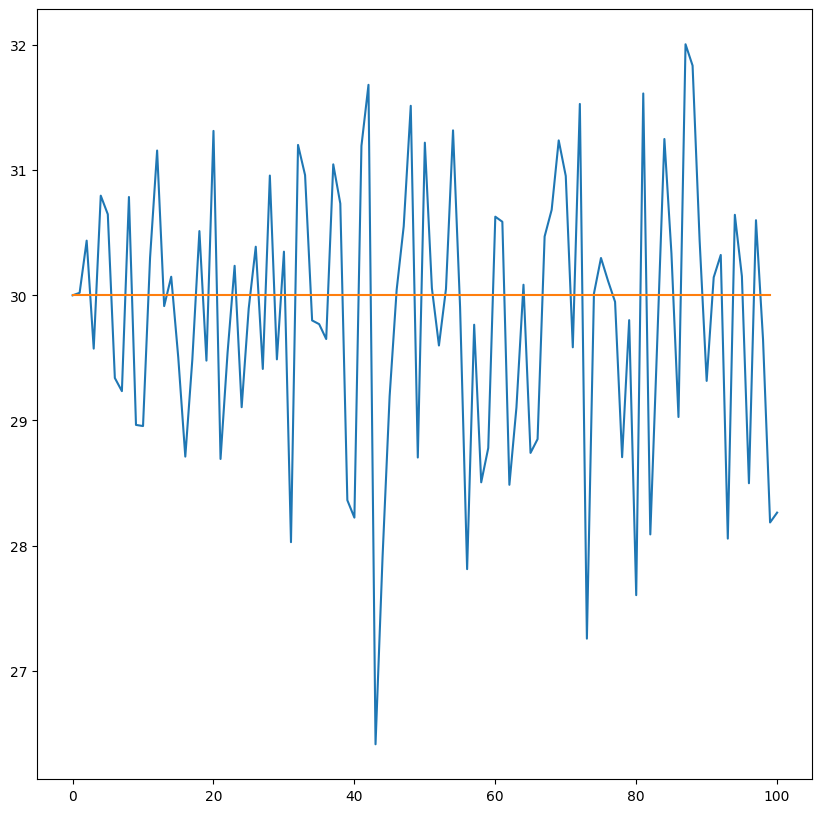

In [ ]:
plt.figure(figsize=(10,10))
display(plt.plot(SV)) #measurements
display(plt.plot([v0]*100)) #true values

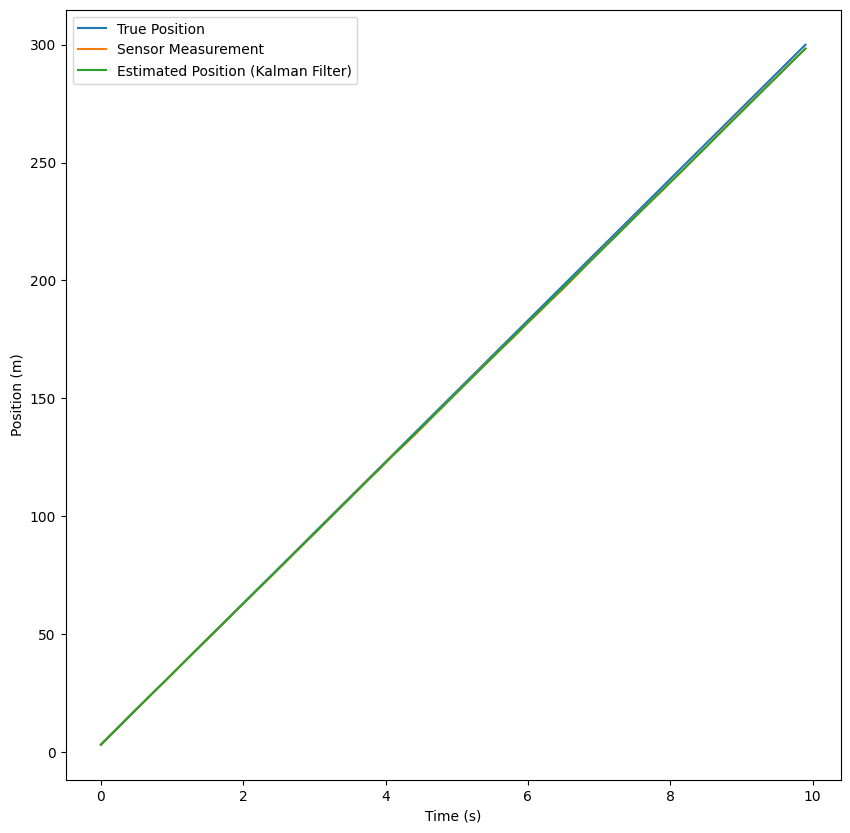

In [ ]:

T = 100    # number of time steps
time = np.arange(T) * dt

# Initialize the Kalman filter
kf = KalmanFilter(
    initial_state_mean = [0, v0],
    initial_state_covariance = [[1,0],[0,1]],
    transition_matrices = [[1, dt], [0, 1]],
    observation_matrices = [[1, 0]],
    observation_covariance = sd**2,
    transition_covariance = np.zeros((2,2)),
)

# Perform the Kalman filtering
(filtered_state_means, filtered_state_covariances) = kf.filter(SL)

# Extract the estimated position from the filtered state means
estimated_position = filtered_state_means[:,0]
# Plot the results
plt.figure(figsize=(10,10))
plt.plot(time, GT, label='True Position')
plt.plot(time, SL, label='Sensor Measurement')
plt.plot(time, estimated_position, label='Estimated Position (Kalman Filter)')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.show()

In [ ]:
estv =[]
for i in range(len(estimated_position)-1):
    v = (estimated_position[i+1]-estimated_position[i])/dt
    estv.append(v)

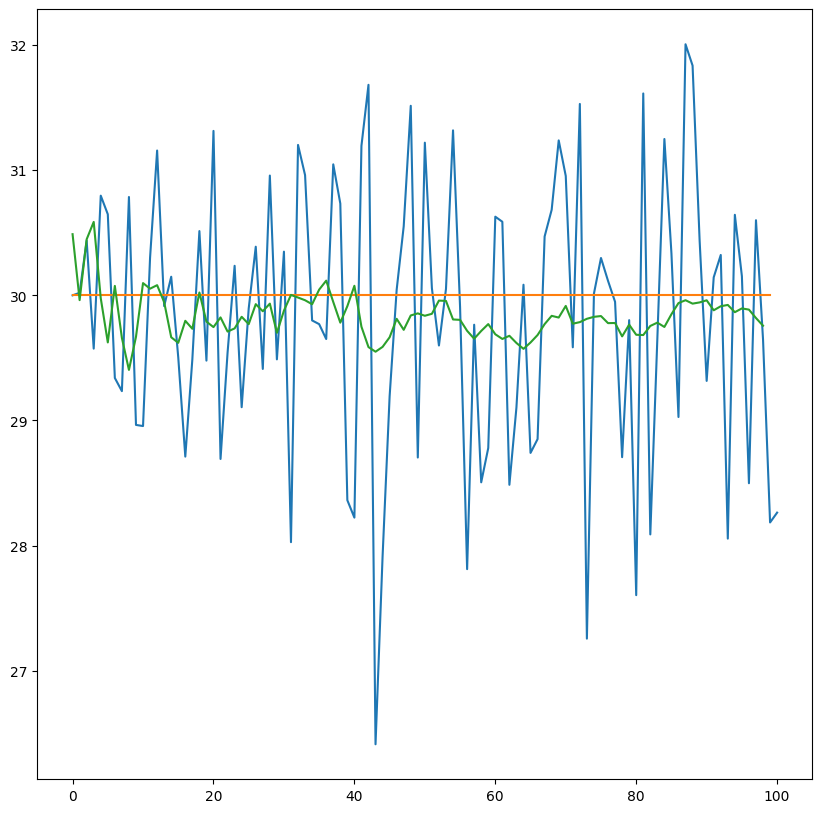

In [ ]:
plt.figure(figsize=(10,10))
display(plt.plot(SV)) #measurements
display(plt.plot([v0]*100)) #true values
display(plt.plot(estv))  #estimated

In [ ]:
mse(GT,estimated_position)

0.4080303157336377

In [ ]:
mse(GT,SL)

0.42244984896004345

In [ ]:
def exprimentt(v0 , mu ,sd ,x0 ,dt ,a , p0 ):
  T = 500    # number of time steps

  #lets calculate ground truth
  GT = []
  x = x0
  for i in range(T): #lets calculate it for 100 intervals.
      v0 = v0
      x = x + dt*v0
      GT.append(x)

  #lets calculate sensor loacations
  SL = []
  x = x0
  v = v0
  SV = [] #sensor recorded velocity
  SV.append(30)
  for i in range(T):
      x_t_1 = x
      x = x + dt*v0 + noise(mu,sd) #here we add random noise to it
      SL.append(x)
      v = (x - x_t_1)/dt
      SV.append(v)


  time = np.arange(T) * dt

  # Initialize the Kalman filter
  kf = KalmanFilter(
      initial_state_mean = [0, v0],
      initial_state_covariance = [[1,0],[0,1]],
      transition_matrices = [[1, dt], [0, 1]],
      observation_matrices = [[1, 0]],
      observation_covariance = sd**2,
      transition_covariance = [[0],[0]],
  )

  # Perform the Kalman filtering
  (filtered_state_means, filtered_state_covariances) = kf.filter(SL)

  # Extract the estimated position from the filtered state means
  estimated_position = filtered_state_means[:,0]
  # Plot the results
  plt.figure(figsize=(10,10))
  plt.plot(time, GT, label='True Position')
  plt.plot(time, SL, label='Sensor Measurement')
  plt.plot(time, estimated_position, label='Estimated Position (Kalman Filter)')
  plt.legend()
  plt.xlabel('Time (s)')
  plt.ylabel('Position (m)')
  plt.show()

  estv =[]
  for i in range(len(estimated_position)-1):
      v = (estimated_position[i+1]-estimated_position[i])/dt
      estv.append(v)


  plt.figure(figsize=(10,10))
  display(plt.plot(SV)) #measurements
  display(plt.plot([v0]*100)) #true values
  display(plt.plot(estv))  #estimated


  print('Estimated :',mse(GT,estimated_position))

  print('Without Estimated',mse(GT,SL))

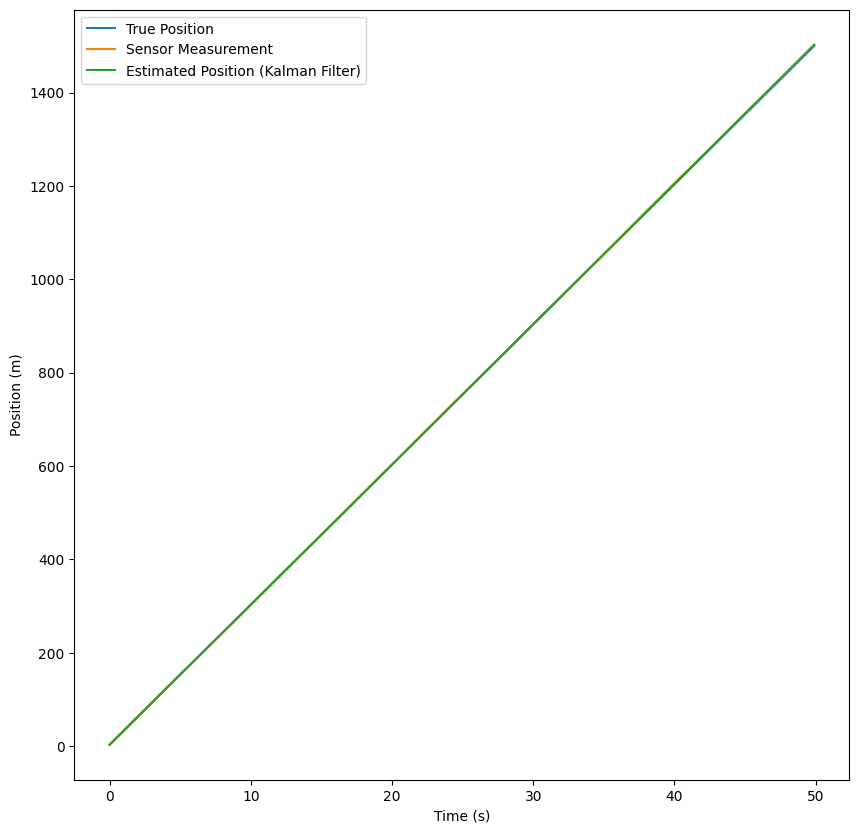

Estimated : 0.5317825406432499
Without Estimated 0.7870274924576269


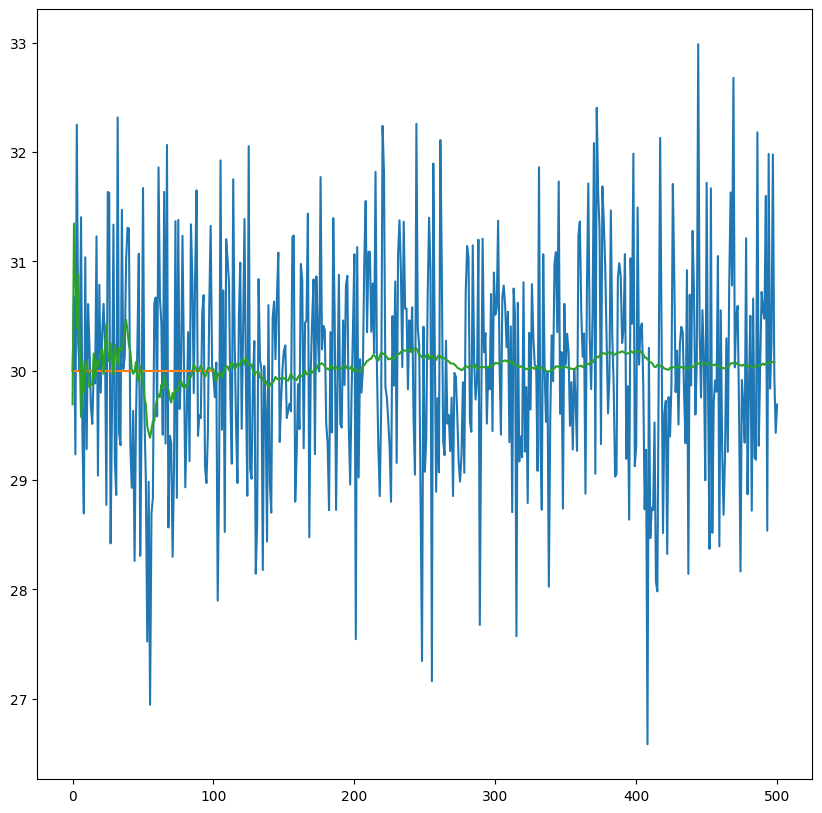

In [ ]:
exprimentt(30,0,0.1,0,0.1,0,0.5)

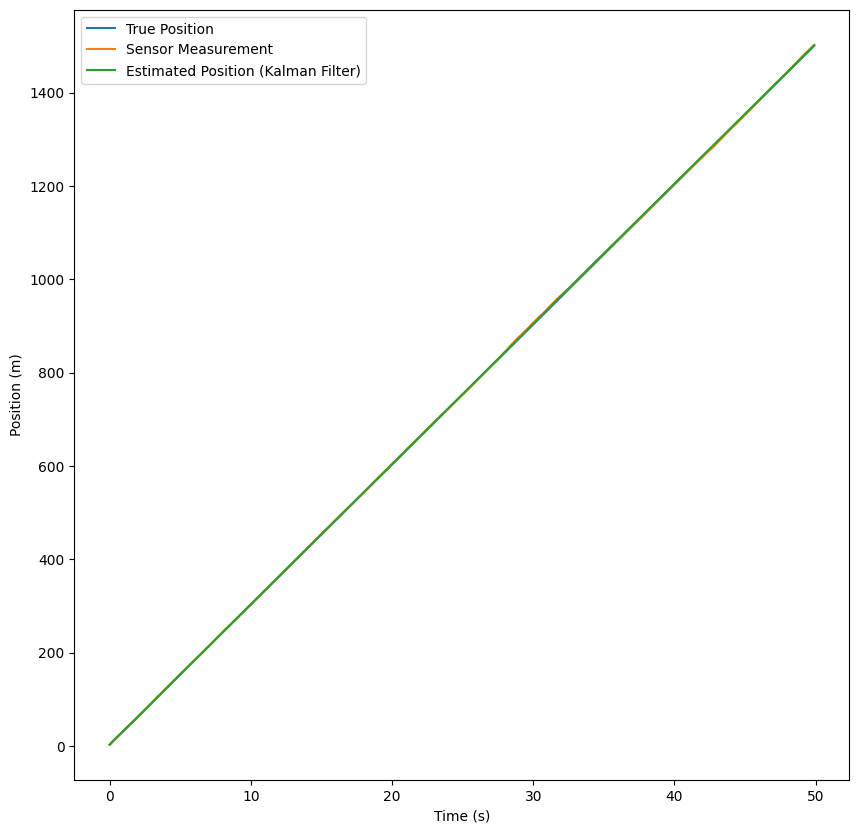

Estimated : 0.7230974967686348
Without Estimated 1.0598611694130453


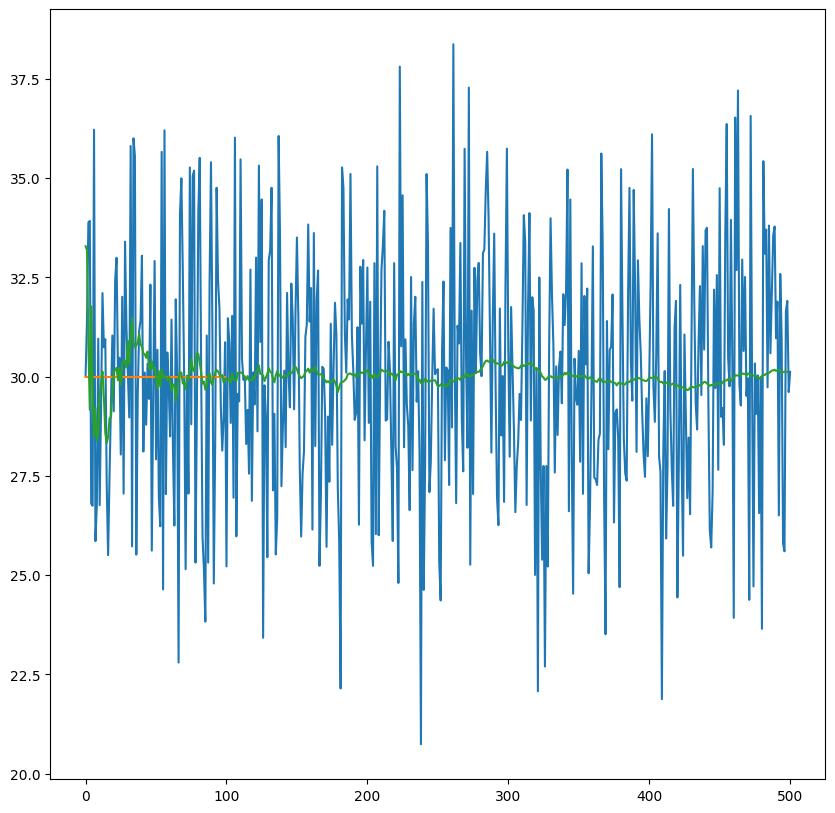

In [ ]:
exprimentt(30,0,0.3,0,0.1,0,0.5)

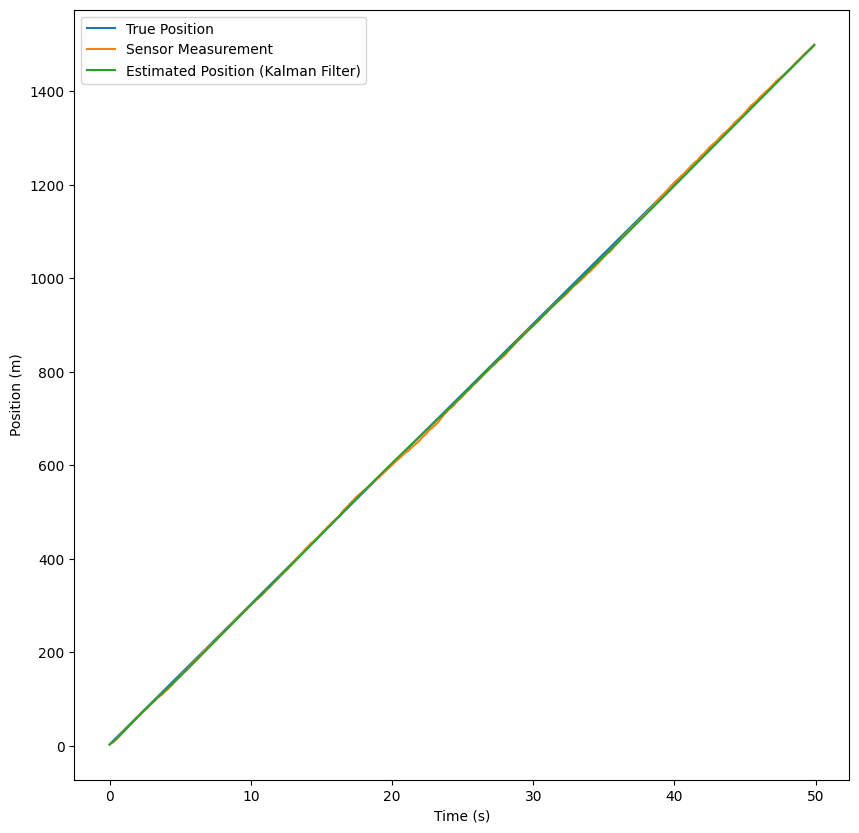

Estimated : 5.307805675816731
Without Estimated 7.671567716640937


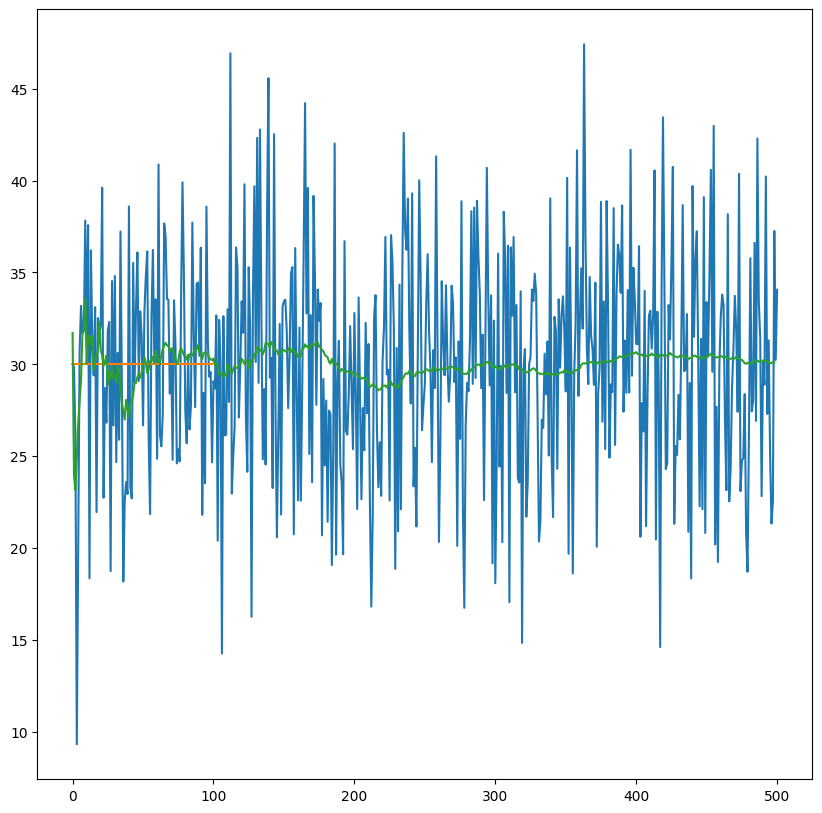

In [ ]:
exprimentt(30,0,0.6,0,0.1,0,0.5)

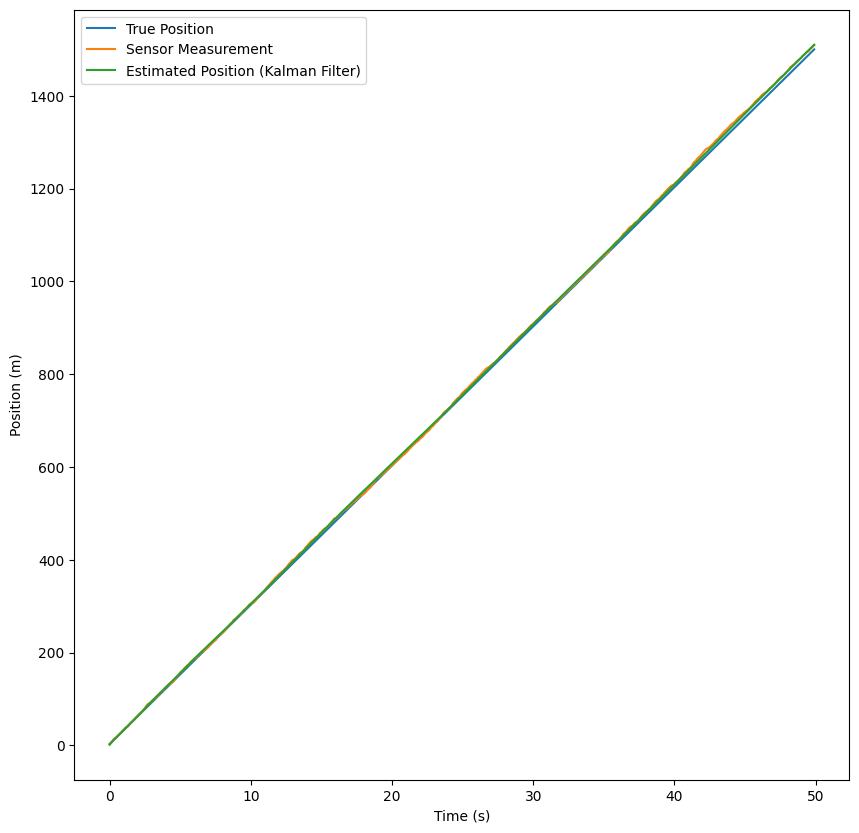

Estimated : 13.461083078701057
Without Estimated 21.140837591842878


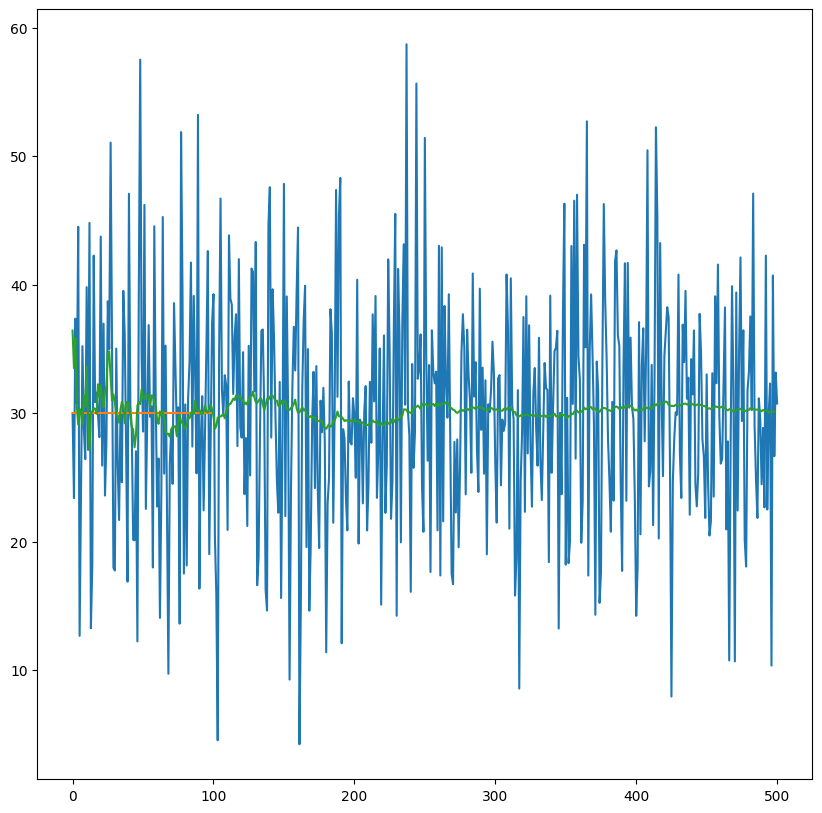

In [ ]:
exprimentt(30,0,0.9,0,0.1,0,0.5)

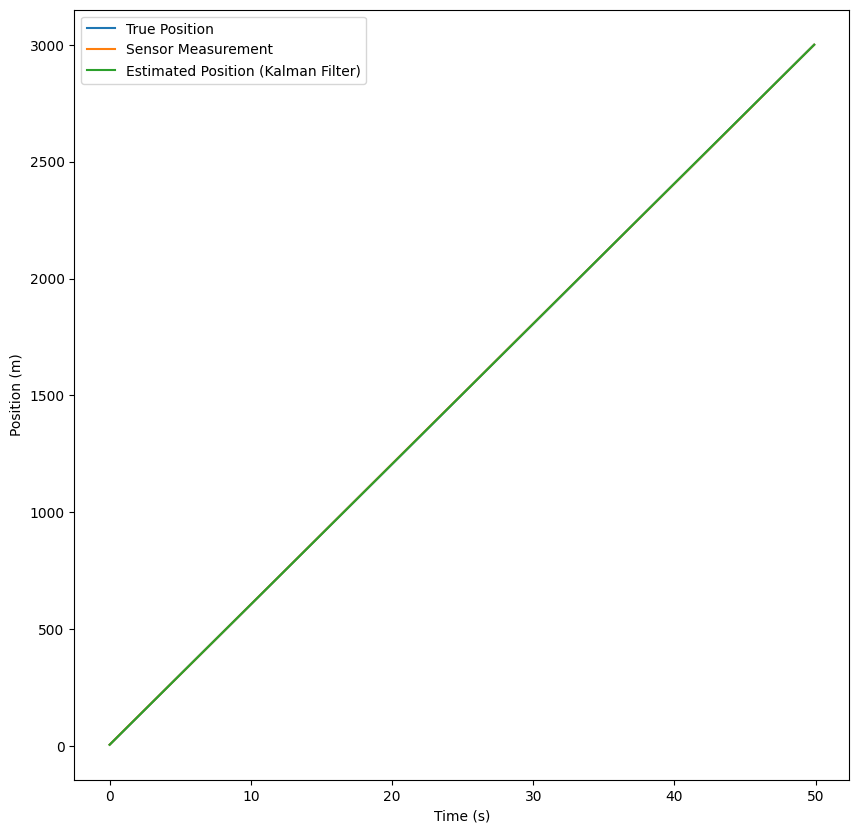

Estimated : 0.20894965243437846
Without Estimated 0.21464880840281245


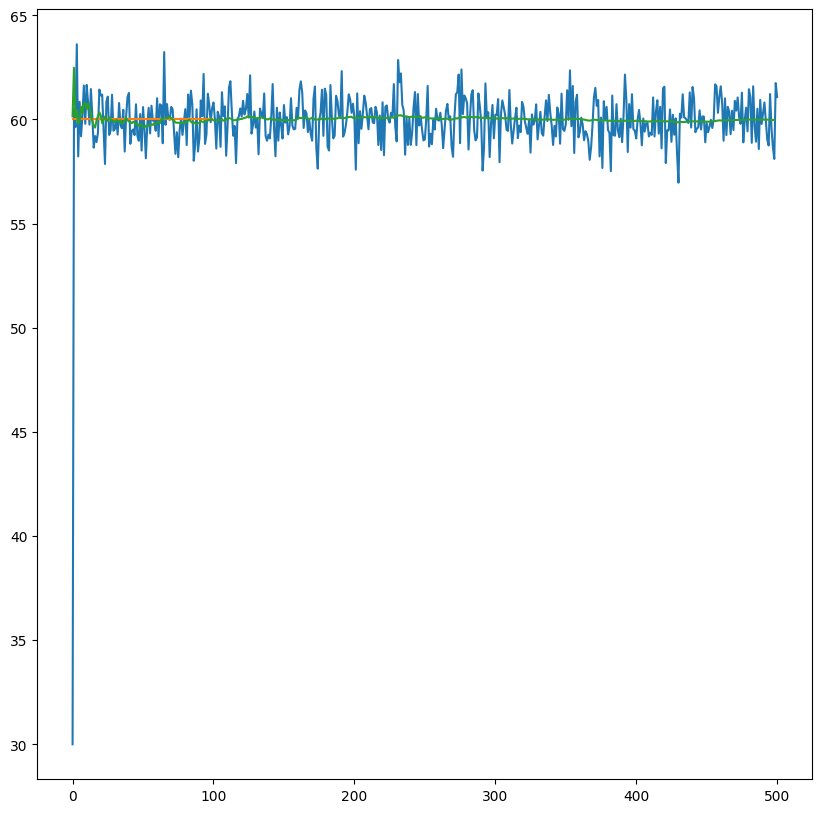

In [ ]:
exprimentt(60,0,0.1,0,0.1,0,0.5)

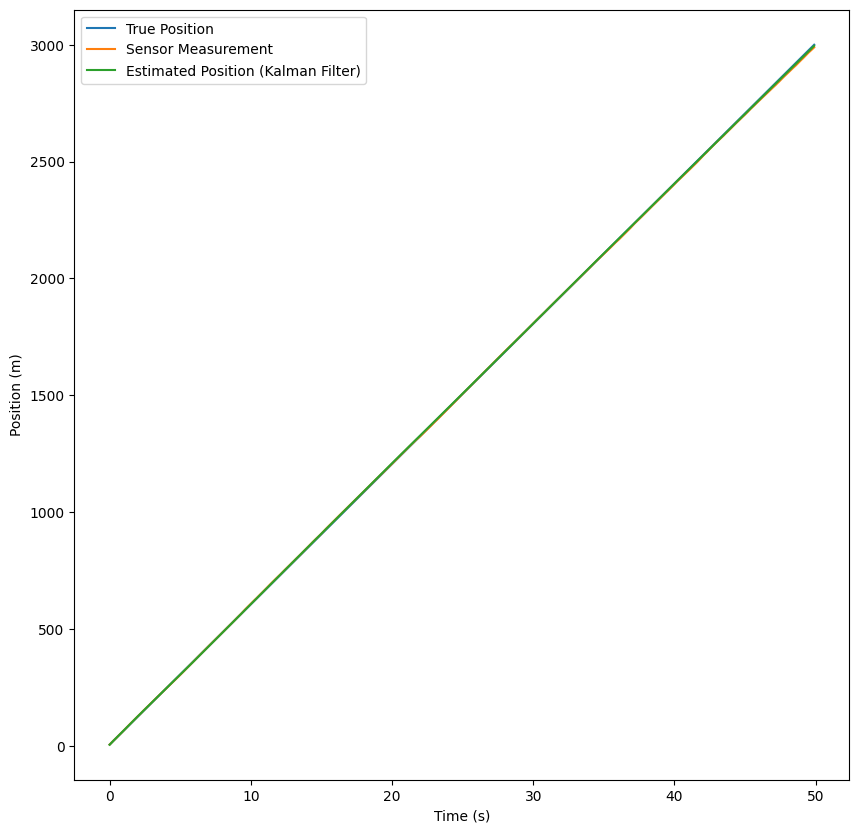

Estimated : 2.0535578795579585
Without Estimated 5.756300362848739


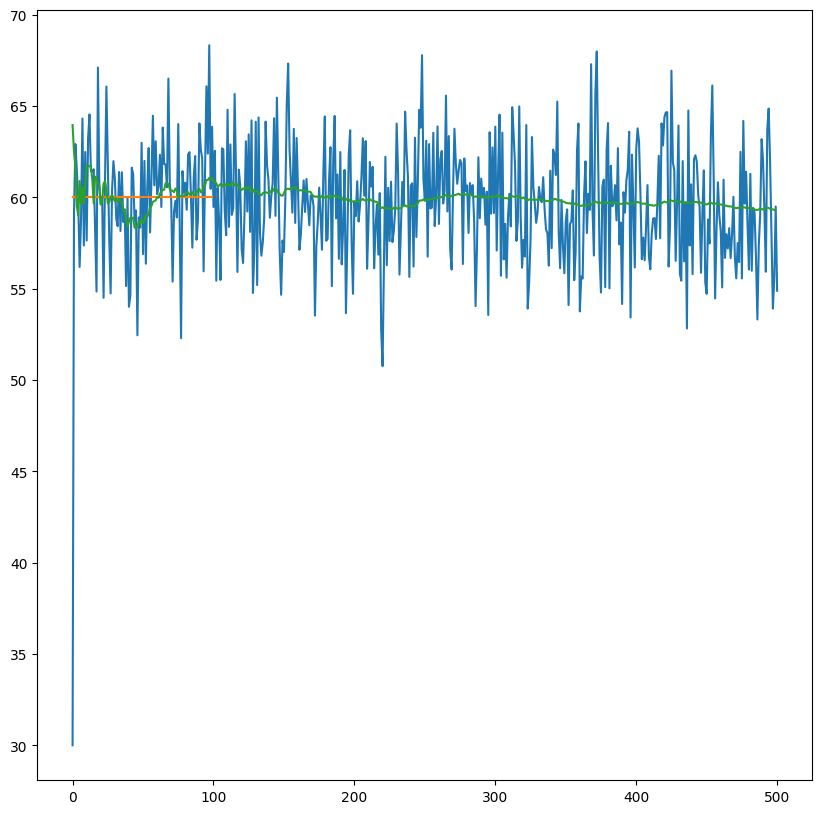

In [ ]:
exprimentt(60,0,0.3,0,0.1,0,0.5)

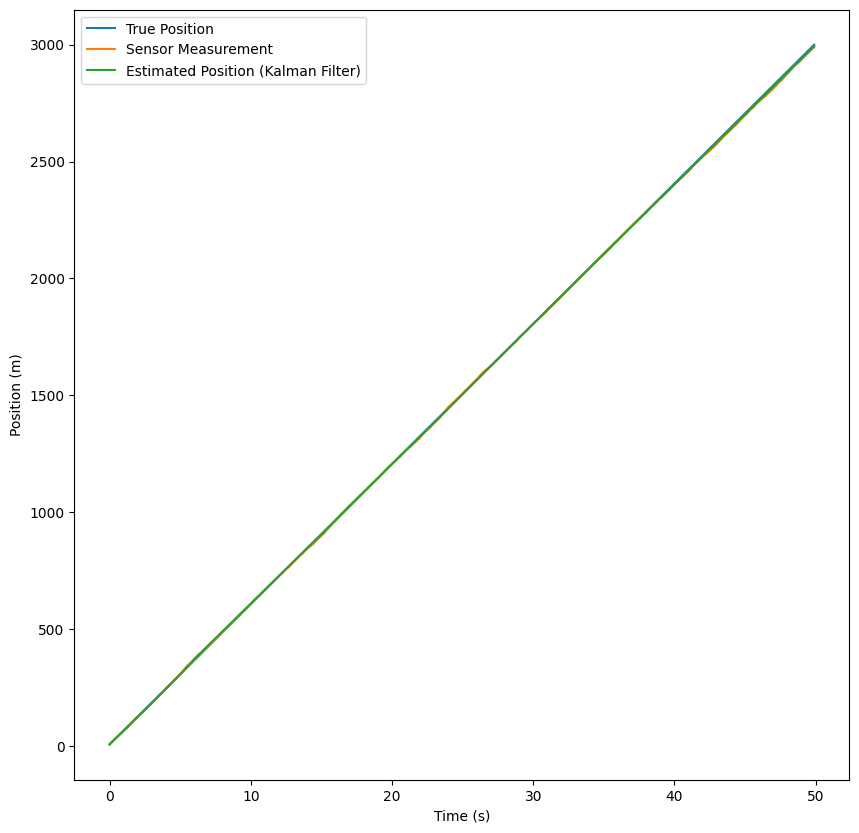

Estimated : 4.272328695687275
Without Estimated 12.163553125183505


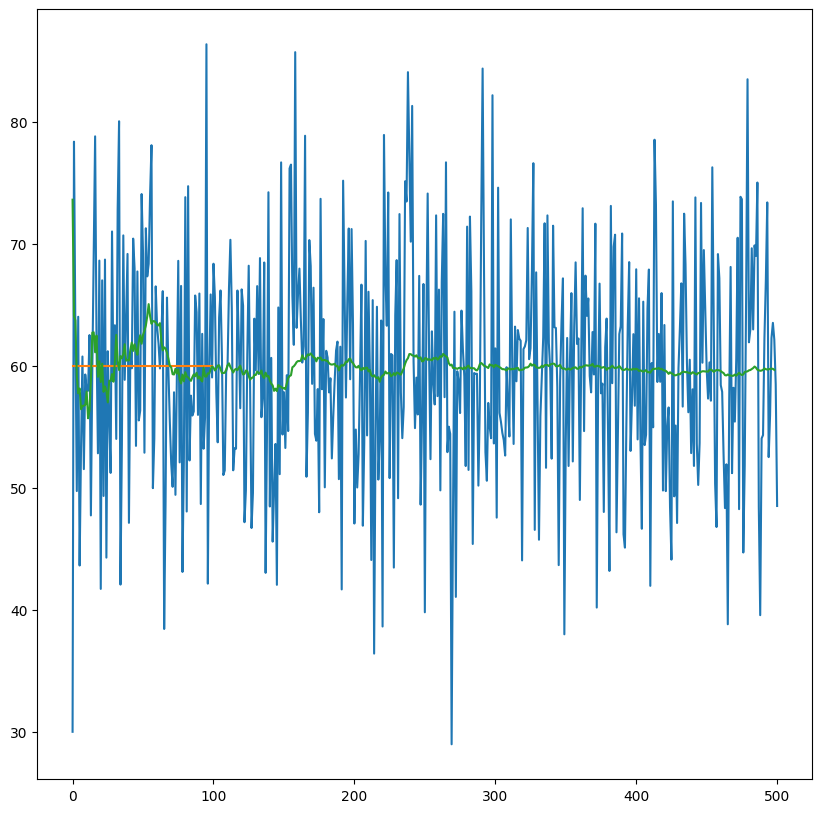

In [ ]:
exprimentt(60,0,0.9,0,0.1,0,0.5)

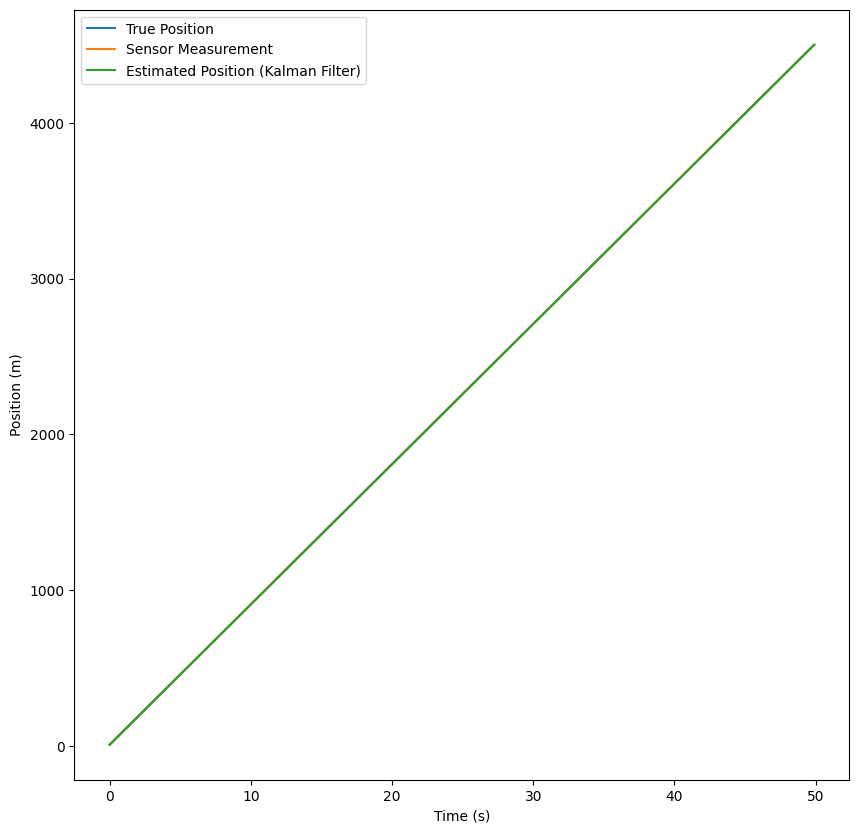

Estimated : 0.33599500683606104
Without Estimated 0.4494227815508326


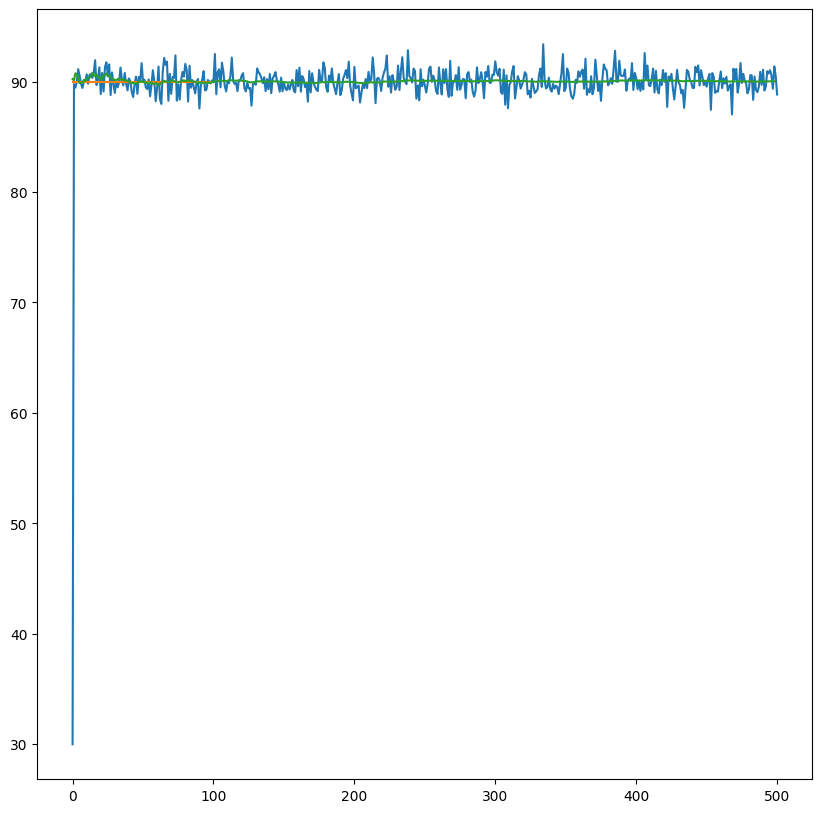

In [ ]:
exprimentt(90,0,0.1,0,0.1,0,0.5)

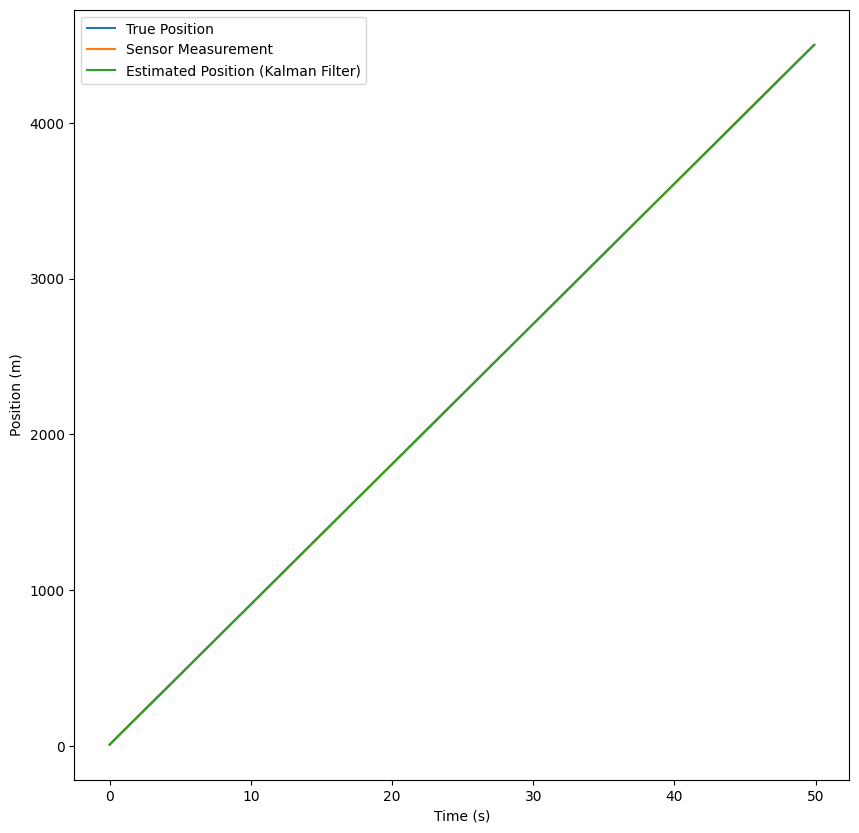

Estimated : 0.47585315251034405
Without Estimated 0.8667631855931386


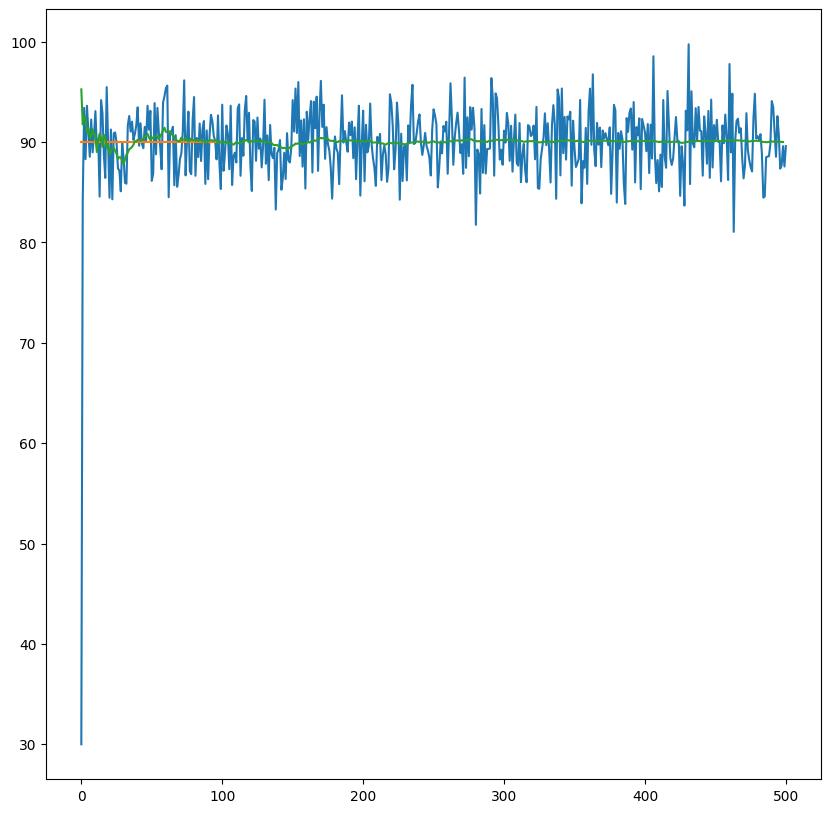

In [ ]:
exprimentt(90,0,0.3,0,0.1,0,0.5)

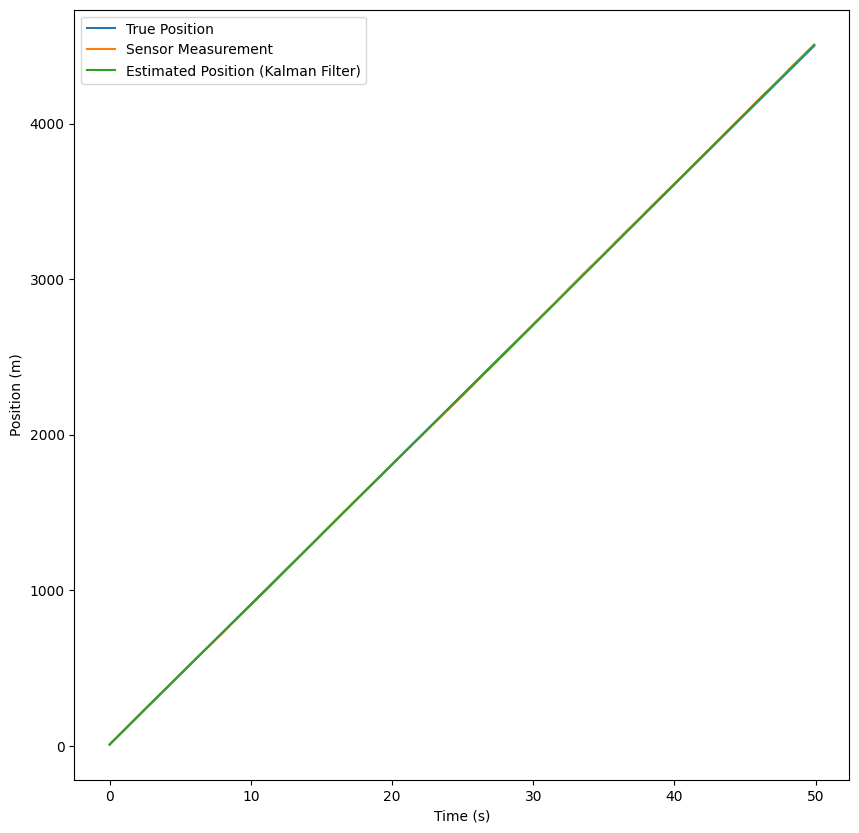

Estimated : 4.020564831115668
Without Estimated 9.850152556030144


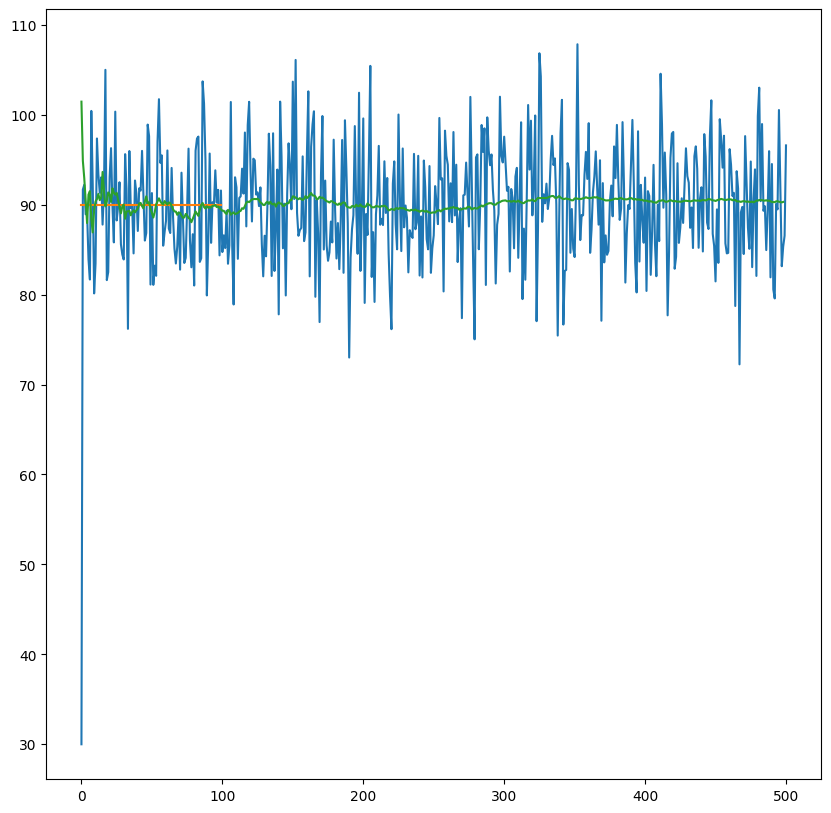

In [ ]:
exprimentt(90,0,0.6,0,0.1,0,0.5)

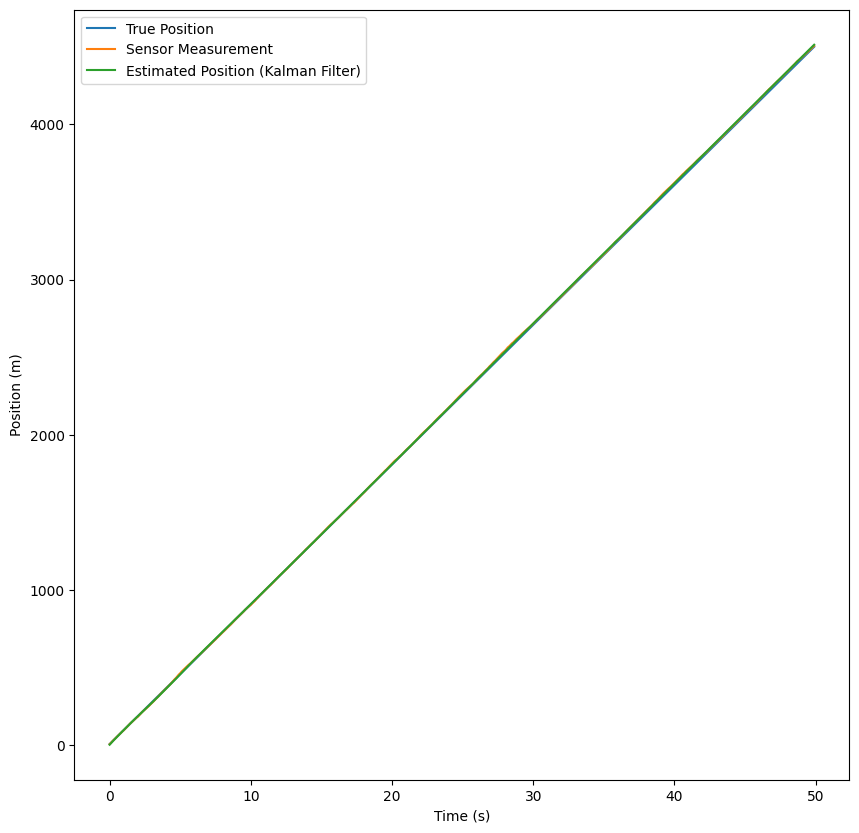

Estimated : 28.56997722035554
Without Estimated 30.280429387611292


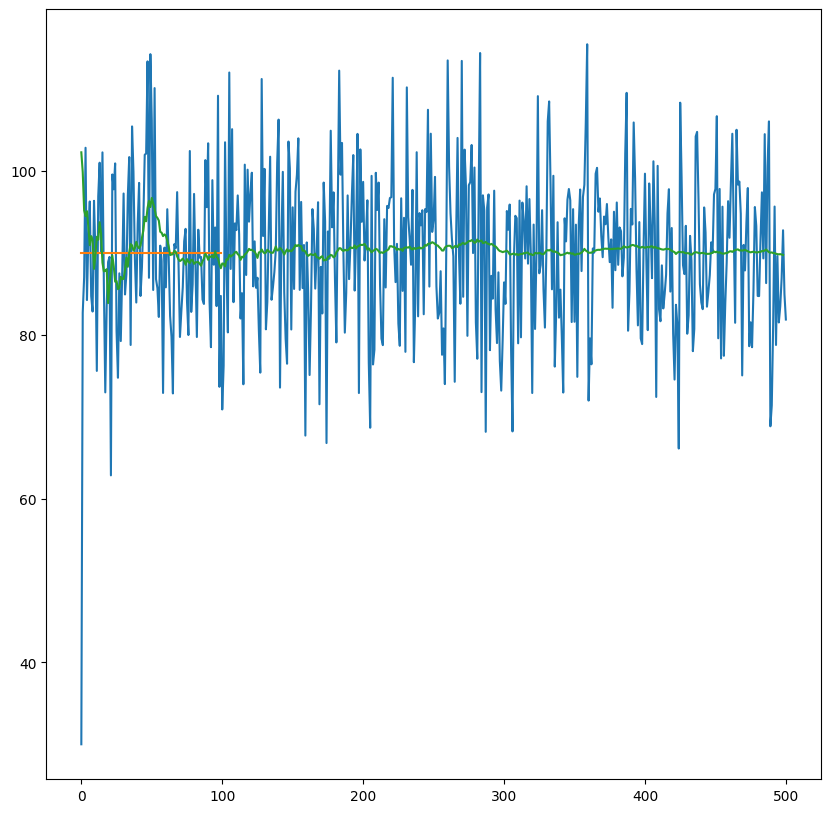

In [ ]:
exprimentt(90,0,0.9,0,0.1,0,0.5)